Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Pieter Verloop, 2013830"
COLLABORATORS = ""

---

Fill in the cell above to provide us with your name and student number, like

NAME = "Adam Smith, #student number#"

where you replace "#student number#" with your ... (very good!)

Unfortunately, you are not allowed to work with "COLLABORATORS" in this exam.

# exam October 16th, 2018

With this python part of the exam you can earn at max. 4 points.




In the first cell of the notebook, give us your name and student number in the way indicated above. 

Fill in the notebook (see below for code cells and text cells that you need to fill in).

If you look at the menus above (File, Edit, View etc.), there is one called "Cell". If you click on this, you can change the "Cell Type". Choose "Code" when you are typing python or R code. Choose "Markdown" when you are typing, well, markdown.

When you finish the notebook, make sure that you **save it with the output of your code included**. 

Then put it on github, e.g. by dragging it onto github (see instructions below). 

Finally, add a link to your README file with the name of this exam: "Exam October 16, 2018".



## Competition and number of firms

We start by importing the usual libraries.

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import optimize
%matplotlib inline

We consider a market with $n$ firms where $n$ can vary. The (inverse) demand function on this market is given by $p(Q)=1-Q$ and firms produce with the same cost function: $c(q)=0.1q$. 

In [54]:
def p(Q):
    return 1-Q

def c(q):
    return 0.1*q

#### a) [0.5 points] Explain in words what the following code does. In particular, why is this the best response of a firm if its competitors produce $Q$ in total? What does "0,1" at the end of the `fminbound` statement mean?

In [55]:
def Best_response(Q):
    q = optimize.fminbound(lambda x: -(p(x+Q)*x-c(x)),0,1)
    return q

The two functions at the beginning are substituted, so the variable q that is left can roll out. Here, the q is optimized. 
Because every firm has the same cost function, the total revenue minus the total cost will be the total profit. The q will roll out for the maximum profit with this function.
The 0 states that we do not want python to show us the full output, so full output = 0. The 1 is the display we want, which will be only one answer, the q for.

The following cell calculates the fixed point for a symmetric equilibrium: if each firm produces $q$ then $q$ should be the best respons to the other firms producing $Q=(n-1)q$ together.

In [56]:
def fixed_point(q,n):
    return q-Best_response((n-1)*q)

#### b) [1 point] Define a function `output(n)` that gives each firm's output level as a function of the number of firms in the market.

[hint: you need to "solve" `fixed_point` as a function of `q`, for a given `n`; use one of the numerical solvers that we used in class]

In [65]:
def output(n):
    return 0.9/n


If you cannot solve b) then use the following function for the remainder of this exam:

`def output(n):
    return 0.9/n`

#### c) [0.5 points] Explain line by line what the following code does. 

[hint: do not worry if you get a "RuntimeWarning"]

In [66]:
range_n = np.arange(1,101,1)
outputs = [output(n) for n in range_n]

df = pd.DataFrame({'n':range_n, 'q':outputs})

A list has been generated of n values between 1 and 100, with a step of 1, which is called 'range_n.
Within this list the return of the output(n) is called 'outputs'.
The dataframe of the above is called 'df'.


#### d) [0.5 points] Plot output per firm $q$ as a function of the number of firms $n$. Put labels on both the horizontal and vertical axes to explain what they show.

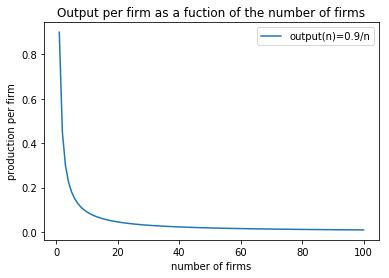

In [68]:
plt.plot(range_n,outputs, label = "output(n)=0.9/n")
plt.xlabel('number of firms')
plt.ylabel('production per firm')
plt.legend()
plt.title("Output per firm as a fuction of the number of firms")
plt.show()

#### e) [0.5 point] Create two new columns for the dataframe `df`: (i) a column `Q` with total equilibrium output in the industry $Q=n*q$ and (ii) a column `p` with the equilibrium price.

In [83]:
df['Q'] = df['n']*df['q']
df['p'] = 1-df['Q']
print(df)

      n         q    Q    p
0     1  0.900000  0.9  0.1
1     2  0.450000  0.9  0.1
2     3  0.300000  0.9  0.1
3     4  0.225000  0.9  0.1
4     5  0.180000  0.9  0.1
5     6  0.150000  0.9  0.1
6     7  0.128571  0.9  0.1
7     8  0.112500  0.9  0.1
8     9  0.100000  0.9  0.1
9    10  0.090000  0.9  0.1
10   11  0.081818  0.9  0.1
11   12  0.075000  0.9  0.1
12   13  0.069231  0.9  0.1
13   14  0.064286  0.9  0.1
14   15  0.060000  0.9  0.1
15   16  0.056250  0.9  0.1
16   17  0.052941  0.9  0.1
17   18  0.050000  0.9  0.1
18   19  0.047368  0.9  0.1
19   20  0.045000  0.9  0.1
20   21  0.042857  0.9  0.1
21   22  0.040909  0.9  0.1
22   23  0.039130  0.9  0.1
23   24  0.037500  0.9  0.1
24   25  0.036000  0.9  0.1
25   26  0.034615  0.9  0.1
26   27  0.033333  0.9  0.1
27   28  0.032143  0.9  0.1
28   29  0.031034  0.9  0.1
29   30  0.030000  0.9  0.1
..  ...       ...  ...  ...
70   71  0.012676  0.9  0.1
71   72  0.012500  0.9  0.1
72   73  0.012329  0.9  0.1
73   74  0.012162  0

#### f) [0.5 points] Make a new plot, this time with price as a function of the number of firms.

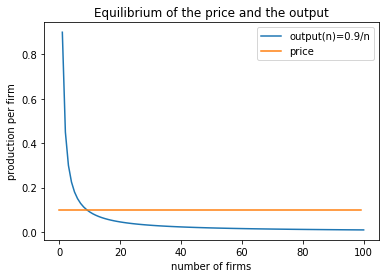

In [87]:
plt.plot(range_n,outputs, label = "output(n)=0.9/n")
plt.plot(df['p'], label = "price")
plt.xlabel('number of firms')
plt.ylabel('production per firm')
plt.legend()
plt.title("Equilibrium of the price and the output")
plt.show()

#### g) [0.5 points] As the number of firms becomes larger (goes to infinity) to which value does $p$ converge? Why is this the case; i.e. what is the *economic* intuition for this?

The market will be a full competition market. A single firm doesn't affect the price by himself, because his market capitulation is very small. He will only be able to choose his production.

## Github

After you have finished, we need to upload this notebook on github.

Instructions on how to upload this on github can be found [on this page](http://janboone.github.io/programming-for-economists/github.html). This page has two screencasts: one shows how to drag the notebook onto your github page, the other shows how you can use the command line to upload your notebook.


Remember to update the README file in your repository to include a link to this notebook on github.


The links that you should post start with “github.com/” and are NOT of the form “http://localhost”. Make sure you test your links after uploading.